In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

## ARIMA and SARIMA of Frequency of Tornados

In [7]:
combined_df = pd.read_csv('..\\DATA\\combined_data.csv')
combined_df['BEGIN_YEARMONTH'] = pd.to_datetime(combined_df['BEGIN_YEARMONTH'].astype(str), format='%Y%m')
filtered_df = combined_df

tornado_frequency = filtered_df.groupby(filtered_df['BEGIN_YEARMONTH']).size()


C:\Users\thabe\AppData\Local\Temp\ipykernel_6940\3529462371.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv('..\\DATA\\combined_data.csv')


In [8]:
#Test to ensure that data is stationary
freq = pd.DataFrame(tornado_frequency)
freq.columns = ['Value']
result = adfuller(freq['Value'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
#P-value < 0.05, fail to reject hypothesis that it is stationary

ADF Statistic: -4.18031010353507
p-value: 0.0007113333707923306


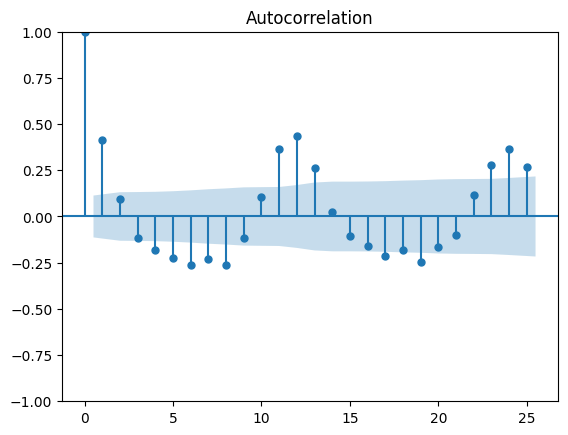

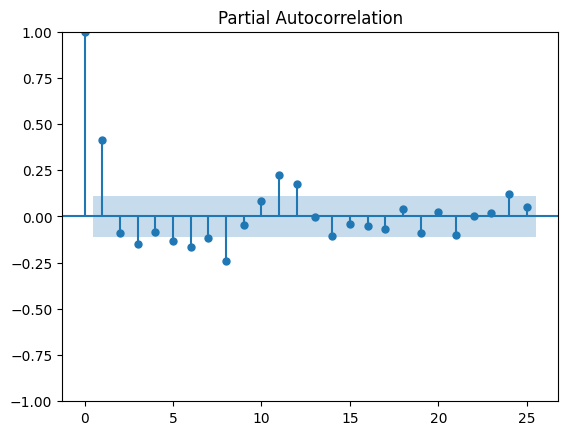

In [9]:
#Plot ACF and PACF to determine order of AR and MA
plot_acf(freq)
plot_pacf(freq)
plt.show()

In [10]:
#80/20 train/test split
train=freq.iloc[:-62]
test=freq.iloc[-62:]
print(train.shape, test.shape)

(237, 1) (62, 1)


In [11]:
#Fit Model and create range for predictions
model = ARIMA(train['Value'], order=(12, 1, 11))
model_fit = model.fit()
start = len(train)  
end = len(train) + len(test) - 1  
pred = model_fit.predict(start=start, end=end, typ='levels')

c:\Users\thabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\thabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\thabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\thabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible startin

np.float64(9845.954768758149)

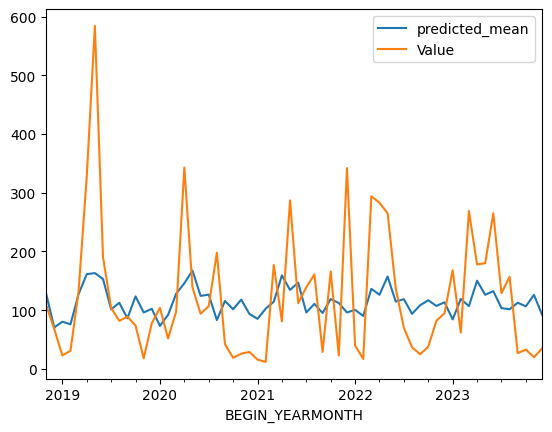

In [12]:
#ARIMA predictions vs actual values. MSE of 9845.95
pred.index = test.index
pred.plot(legend=True)
test['Value'].plot(legend=True)
MSE = mean_squared_error(pred,test['Value'])
MSE

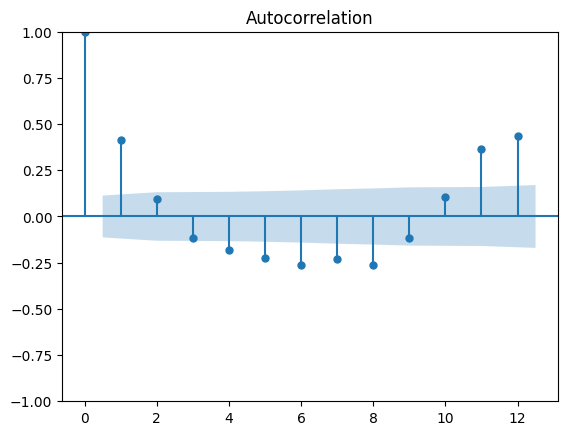

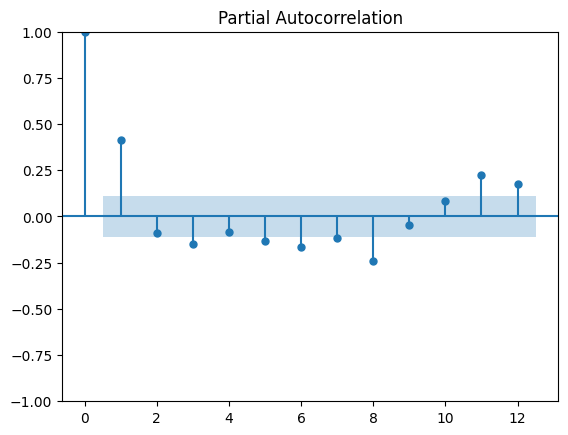

In [13]:
##Plot ACF and PACF to determine order of AR and MA
plot_acf(freq, lags = 12)
plot_pacf(freq, lags = 12)
plt.show()

In [14]:
#Fit Model and create range for predictions, using the same range for train / test
model_sarima = SARIMAX(train['Value'], 
                       order=(1, 0, 1),          
                       seasonal_order=(1, 0, 1, 12))
model_sarima_fit = model_sarima.fit()
start = len(train)  
end = len(train) + len(test) - 1  
pred = model_sarima_fit.predict(start=start, end=end, typ='levels')



c:\Users\thabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\thabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\thabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\thabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the 

np.float64(7796.830957104562)

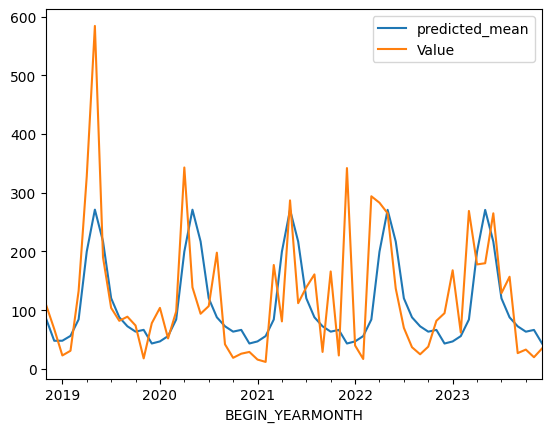

In [15]:
#SARIMA predictions vs actual values. MSE of 7796.83
#Substantially preferred to ARIMA, better at capturing seasonality
pred.index = test.index
pred.plot(legend=True)
test['Value'].plot(legend=True)
MSE = mean_squared_error(pred,test['Value'])
MSE